# Computational Experiments -- Recombination vs Recurrence

## Goals
We aim to examine how the *incompatibility graph* produced by cross-over recombination differs from that produced by recurrent mutation. Ideally this experiment would help us develop and comunicate intuition for how the two models of sequence evolution difer, which would then allow us to distinguish the two types of events from one another with greater ease.

If appropriate, results from this experiment could be included in the paper togherer with or instead of the conceptual illustrations in figure 4.

## Potential experiments
Multiple different approaches seem possible:

1. Qualitative
    
  1. Use rejection sampling to simulate two datasets:
     * One with a single recombination evident in data.
     * One with a single recurrent mutation evindent in data.

  2. Fix two mutation rates $0 < \theta_{\text{low}} \ll \theta_{\text{high}}$ and a recombination-rate $\rho > 0$.
     Proceed to simulate two diferent datasets:       
     * One mutation rate $\theta_{\text{low}}$ and recombination rate $\rho$.
     * One mutation rate $\theta_{\text{high}}$ and recombination rate $0$.
       
    In either case, we would then for each dataset compute the incompatibility-graph and display the two side by side. THe experiment could be re-run to examine by naked eye the variation possible.

2. Quantitative
    
  1. Statistical properties of the incompatibility graph under either model: sample a large number of datasets under either model; for each dataset, compute the incompatability graph. Compute sample averages of graph-statistics for either model (e.g compare the degree-distribution in the graphs).
    * A simple statistic to distinguishing a star-shaped graph from a regular bipartite one might be $\max_{v \in V} \deg(v)$.
  2. Search for a good classifier: simulate a large set of incompatibility graphs for either model (like above). Attempt to construct a classifier that accurately predicts to which class new simulated incompatibility graphs belong.
    * Initially, seeing how various rules of thumb perform would be interesting.
    * Long term: we could examine classic classifiers fomr the mashine learning litterature, e.g. Support vecor machines or neural networks.

## Planned approach
I intend to start out with conducting experiment 1.A.
    
 * A good example would fit well into the article we are writing, and
 * Solving this problem is a stepping stone to solving more complex problems.
    
Afterwards, I would like to approach problem 2.A, and examine how informative $\max_{v \in V} \deg(v)$ is as a statistic for distinguishing the cause of incompatibilities. It might be usefull to contrast the results of experimets 1.A and 1.B.


## Project status

### What has already been done:
* I have already written code which is capable of simulating coalescents with recurrent ,mutations. Hence half of experiments 1.A and 1.B are as good as done.

### What remains to be done:

1. I need to write a sampler for sequences experiencing recombination, or to find a package which allows me to do so.
  1. My first task is to go through the litterature and see if I can find a library which supports simulating sequences in a 4 letter alphabet related by a coalescebt undergoing mutation.
  2. If i can't find anything, I'll write a sampler myself.

2. I need to a small script which automates carrying out each of the experiments i intend to carry out.

3. I need to write code for displaying the results.
  1. In particluar, I need to be able go generate good pictures of arbitrary incompatability graphs on the fly.
    1. Before re-inventing the wheel I should look at what good experiments exist out there.
       * I have decided to give [**networkx**](https://networkx.readthedocs.io) a spin. It seems to be able to do most of what i want with ease.

## Showing off
*Below I intend to insert some code snippets and outputs as the project progresses*

## Results from an old experiment I ran for Jotun

Jotun was interested in estimating what happened as the mutaion rate was cranked up a bit.

The main aim of the experiment was to output the plots at the bottom:
* the left hand one examining the distribution on the proportion of sites which exhibit 1, 2, 3, or 4 alleles as $\frac{\theta}{L}$ varies.
* the right hand plot examining how frequently the largest connected component in the incompatibility graph has size $s$ as $\frac{\theta}{L}$ varies.

A side effect which is of interest to us, is that I had it print the incompatibility graph any time the largest connected component contained at least 10 verticees.

Currently, I am re-tooling the old code from this experient to be used in our new experiments.

In [1]:
%matplotlib inline
import sys

In [2]:
## I import my simulator
simulations_dir = '/home/mathias/programming/coalescent-simulations'
sys.path.append(simulations_dir)
import finiteSitesModell_investigations as fsmi
import matplotlib.pyplot as plt

In [3]:
#fsmi.generate_plots_for_jotun(thetaMax=10,thetaMin=0.1,steps=3,N=10,savePath='')

## Playing around with networkx

Here I'm playing around with the basic commands for generating graphs and displaying them

In [4]:
import networkx as nx

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10)]


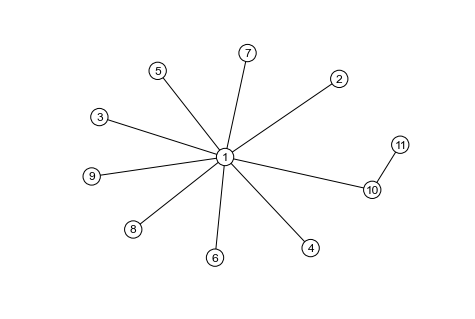

In [5]:
# G = nx.Graph()
# G.add_nodes_from(range(20))
# G.add_edges_from([(i,10+i) for i in range(10)])

# nx.draw(G)

#nx.draw_spectral(G)

#nx.draw_shell(G)

#nx.draw_random(G)

#nx.draw_spring(G)

G2 = nx.Graph()

G2.add_edges_from([(1,i) for i in range(2,11)])

print G2.edges()

#nx.draw_shell(G2)

#nx.draw_spring(G2)

G2.add_edge(10,11)
nx.draw_spring(G2,with_labels=True, node_color = 'w')

[g for g in nx.components.connected.connected_component_subgraphs(G2)][0]

## A simple experiment

We sample a finite sites model with mutation rate $\frac{\theta}{2}$, compute the incompatibility graph and output its largest component. Note that there is no conditioning on the number of segregating sites or recurring mutations in this experiment.

When displaying the largest connected component of the incompatability graph, each labelled with the site it represents and coloured according to the number of mutations affecting that site. The colouring scheme used was the following:
    
>    indexed_palette = {

>                    0:'white',
>                    1:'pink',
>                    2:'turquoise',
>                    3:'lightgrey',
>                    4:'blue',
>                    5:'purple',
>                    6:'yellow',
>                    7:'darkgreen',
>                    8:'lime',
>                    9:'teal',
>                    10:'black',
>                    11:'green',
>                    12:'red',
>                    13:'orange'}

At the request of Jotun, I also print the incompatibility graph of the largest connected component.

In [6]:
from incompatability_graph_experiments import *

[[ 1  2  2  2  2  2  2  2 14  2 16  2  2  2  2  2  1  2]
 [ 0  1  3  3  2  2  1  3  0  2  0  3  3  2  3  2  0  3]
 [ 1  1  3  3  2  2  1  3  1  2  2  3  3  2  3  2  3  3]
 [ 0  0  0  0  0  0  0  0  2  0  3  0  0  0  0  0  0  0]
 [ 1  1  3  3  2  2  1  3  1  2  0  3  3  2  3  2  3  3]
 [ 1  1  3  3  2  2  1  3  1  2  0  3  3  2  3  2  3  3]
 [ 0  0  0  0  0  0  0  0  2  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  3  0  0  0  0  0  0  0]
 [ 1  1  3  3  2  2  1  3  1  2  2  3  3  2  3  2  3  3]
 [ 0  0  3  0  2  0  0  3  0  2  0  3  0  2  3  0  0  3]
 [ 1  1  3  3  2  2  1  3  1  2  0  3  3  2  3  2  3  3]
 [ 0  0  0  0  0  0  0  0  2  0  3  0  0  0  0  0  0  0]
 [ 0  0  3  0  2  0  0  3  0  2  0  3  0  2  3  0  0  3]
 [ 0  0  0  0  0  0  0  0  2  0  3  0  0  0  0  0  0  0]
 [ 0  1  3  3  2  2  1  3  0  2  0  3  3  2  3  2  0  3]]


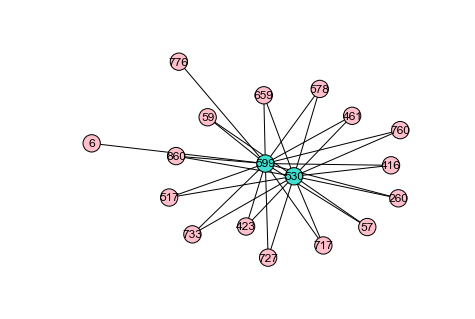

In [7]:
np.random.seed(1723000000)
results = simulate_single_graph_and_output_incompatibility_graph(n =15, L = 1000, theta = 25.0, draw_largest_connected_component = True)
determine_S_of_connected_components(results,with_header=True)
G_sim = results['graph']
sim = results['simulation']

In [8]:
# print sim.site_mutationCount
# print [c for c in results['components_as_sets'] if len(c) > 1]

#### We demonstrate how the output of the graph can be used

In [9]:
#large_components = [g_sim for g_sim in results['components'] if len(g_sim.nodes()) > 1]
largest_connected_component = max(results['components'], key = lambda g: len(g.nodes()))
print largest_connected_component.degree()
largest_connected_component.edges()

{416: 2, 578: 2, 260: 2, 517: 2, 6: 1, 423: 2, 776: 1, 727: 2, 461: 2, 717: 2, 530: 14, 659: 2, 599: 16, 760: 2, 57: 2, 59: 2, 860: 2, 733: 2}


[(416, 530),
 (416, 599),
 (578, 530),
 (578, 599),
 (260, 530),
 (260, 599),
 (517, 530),
 (517, 599),
 (6, 599),
 (423, 530),
 (423, 599),
 (776, 599),
 (599, 461),
 (599, 717),
 (599, 659),
 (599, 727),
 (599, 760),
 (599, 57),
 (599, 59),
 (599, 860),
 (599, 733),
 (461, 530),
 (717, 530),
 (530, 659),
 (530, 727),
 (530, 760),
 (530, 57),
 (530, 59),
 (530, 860),
 (530, 733)]

[[ 1  1  1  1  1  1  1  1  3 22  1  1  1  1  1  1  1  1  1  2  1  3  1  1]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 3  3  3  1  1  3  2  1  2  0  2  2  3  3  2  3  3  2  3  1  3  0  3  2]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0

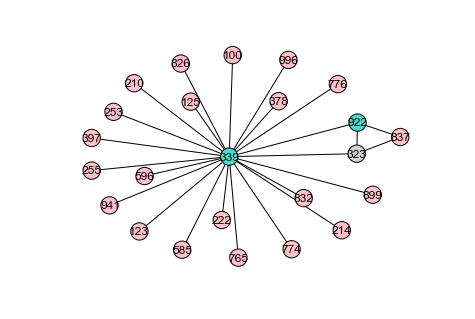

In [10]:
np.random.seed(172300001)
results = simulate_single_graph_and_output_incompatibility_graph(n =15, L = 1000, theta = 25.0, draw_largest_connected_component = True)
determine_S_of_connected_components(results,with_header=True)

[[ 1  1  1  3 14  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 0  2  0  0  3  0  3  0  0  3  0  3  0  2  0  0  1]
 [ 0  2  0  0  0  0  3  0  0  0  0  3  0  2  0  0  0]
 [ 3  0  3  0  3  2  0  1  3  0  2  0  2  0  1  2  0]
 [ 0  2  0  2  0  0  3  0  0  0  0  3  0  2  0  0  0]
 [ 0  2  0  2  0  0  3  0  0  0  0  3  0  2  0  0  0]
 [ 0  2  0  0  3  0  3  0  0  3  0  3  0  2  0  0  1]
 [ 3  0  3  0  0  2  0  1  3  0  2  0  2  0  1  2  0]
 [ 3  0  3  0  3  2  0  1  3  0  2  0  2  0  1  2  0]
 [ 0  2  0  0  3  0  3  0  0  3  0  3  0  2  0  0  1]
 [ 0  2  0  3  3  0  3  0  0  3  0  3  0  2  0  0  1]
 [ 0  2  0  0  0  0  3  0  0  0  0  3  0  2  0  0  0]
 [ 0  2  0  3  3  0  3  0  0  3  0  3  0  2  0  0  1]
 [ 0  2  0  3  3  0  3  0  0  3  0  3  0  2  0  0  1]
 [ 0  2  0  0  3  0  3  0  0  3  0  3  0  2  0  0  1]
 [ 0  2  0  3  3  0  3  0  0  3  0  3  0  2  0  0  1]]


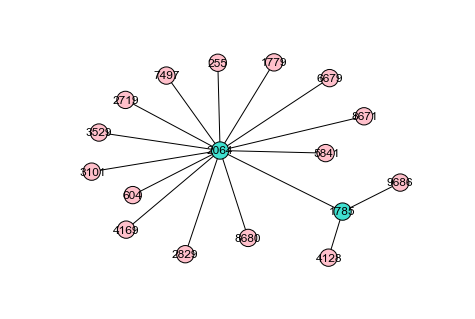

In [11]:
np.random.seed(172300006)
results = simulate_single_graph_and_output_incompatibility_graph(n =15, L = 10000, theta = 50.0, draw_largest_connected_component = True)
determine_S_of_connected_components(results,with_header=True)

### When the site-wise mutation rate is high, the incompatibility graph stops being' star-shaped. Below, we see some examples of this

Below we see a single example

[[3 4 4 4 5 1 3]
 [3 0 0 1 1 0 3]
 [0 3 2 0 2 0 0]
 [2 3 3 0 0 2 1]
 [1 2 0 2 1 0 3]
 [2 3 3 2 0 2 1]]


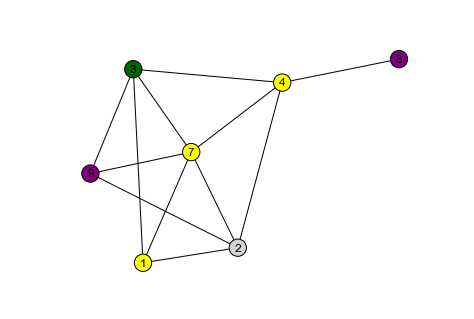

In [12]:
np.random.seed(172300001)
results = simulate_single_graph_and_output_incompatibility_graph(n =5, L = 10, theta = 10.0, draw_largest_connected_component = True)
determine_S_of_connected_components(results,with_header=True)

If we for the moment ignore the S-matricees, we can generate a larger array of incompatibility matricees to see the diversity at different mutation rates.

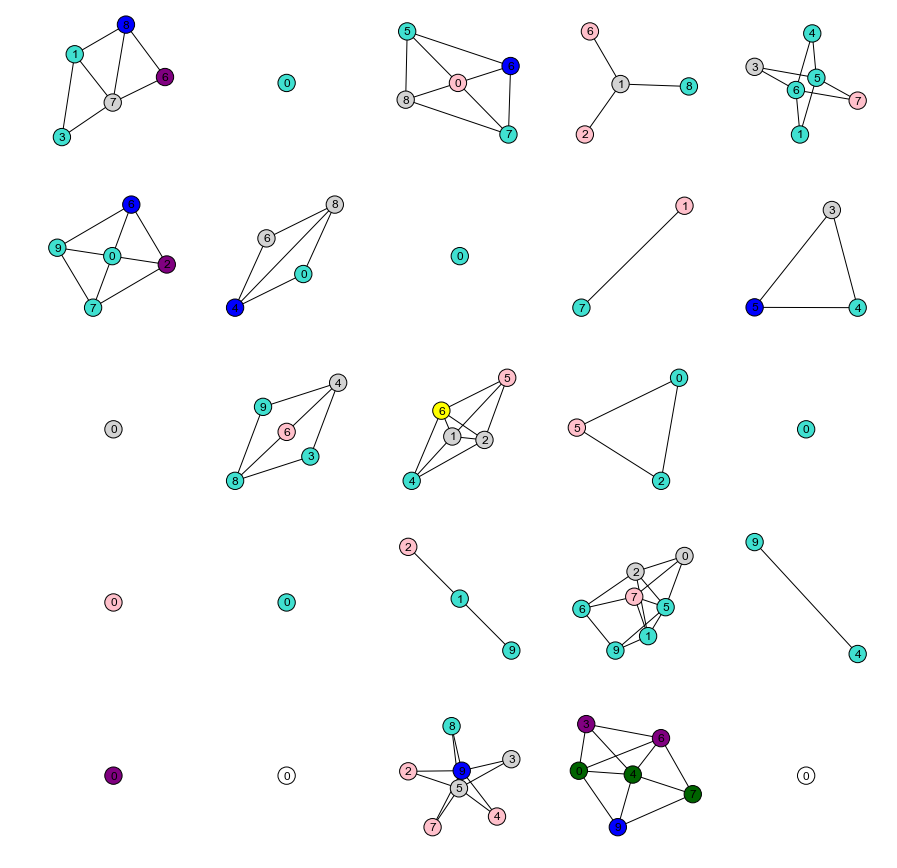

In [13]:
fig = plt.figure(figsize = (15,15))
cols = 5
rows = 5
graphs = rows*cols
for i in range(graphs):
    plt.subplot(rows,cols,i)
    #print i
    results = simulate_single_graph_and_output_incompatibility_graph(n =5, L = 10, theta = 10.0, draw_largest_connected_component = True)
    #print 
    determine_S_of_connected_components(results,print_results=False,with_header=True)
plt.draw()

We now preceed to make pictures like above, but with different parameter valies. I will start examinig what happens as the site-wise mutation rate is increased for 3 sequences observed at 10 sites:

## Setting: $n=3, L = 10, \theta = 1$

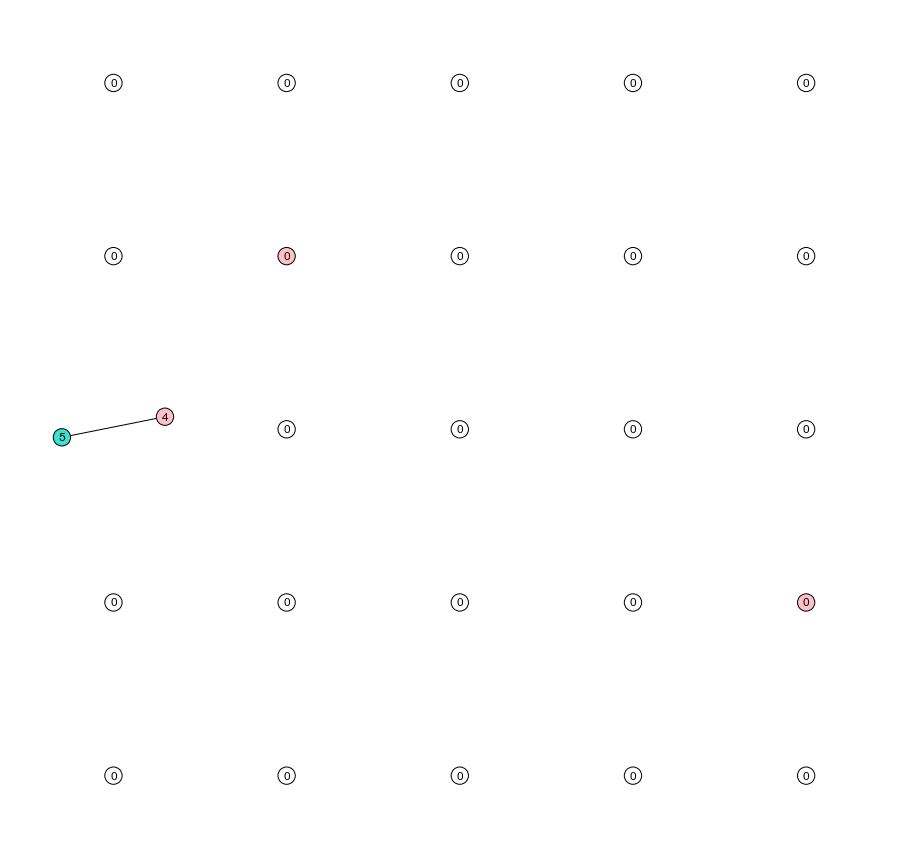

In [14]:
np.random.seed(1723)
fig = plt.figure(figsize = (15,15))
cols = 5
rows = 5
graphs = rows*cols
for i in range(graphs):
    plt.subplot(rows,cols,i)
    #print i
    results = simulate_single_graph_and_output_incompatibility_graph(n =3, L = 10, theta = 1.0, draw_largest_connected_component = True)
    #print 
    determine_S_of_connected_components(results,print_results=False,with_header=True)
plt.draw()

We see that little is going on here (as expected).

## Setting: $n=3, L = 10, \theta = 5$
(same as before but the site wise mutation rate $\frac \theta {2 L}$ is increased to 0.25 (a tenfold increase)

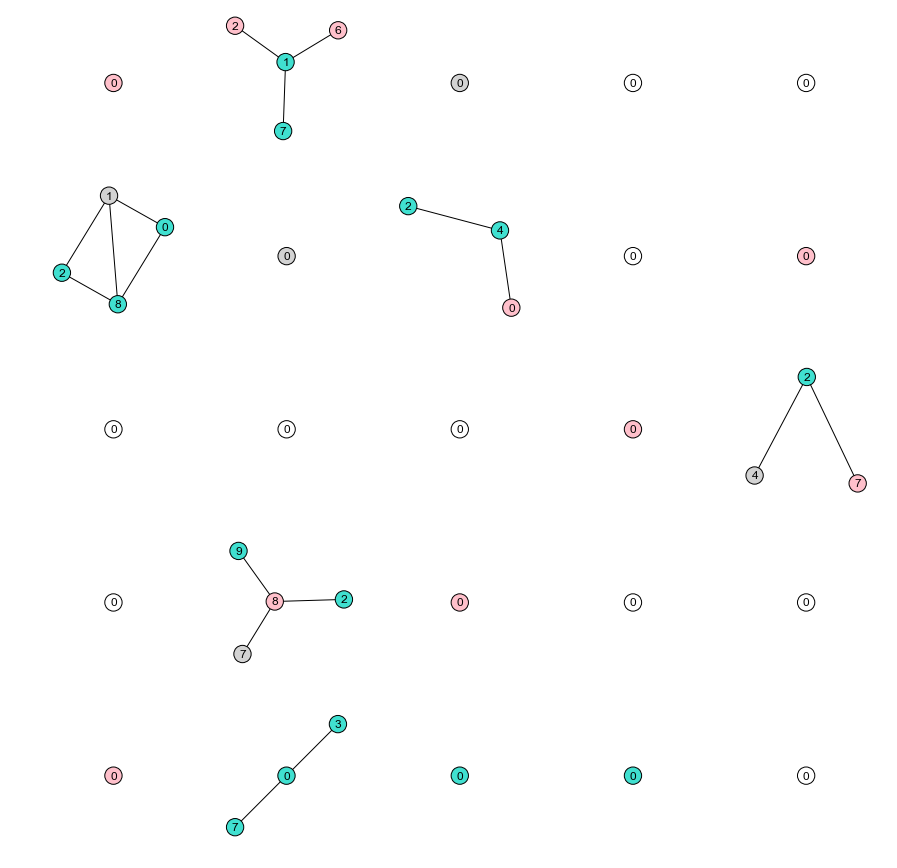

In [15]:
np.random.seed(2317)
fig = plt.figure(figsize = (15,15))
cols = 5
rows = 5
graphs = rows*cols
for i in range(graphs):
    plt.subplot(rows,cols,i)
    #print i
    results = simulate_single_graph_and_output_incompatibility_graph(n =3 , L = 10, theta = 5.0, draw_largest_connected_component = True)
    #print 
    determine_S_of_connected_components(results,print_results=False,with_header=True)
plt.draw()

We see here that this leads to an increased pressence of incompatibilities, and that the structure fo the incompatibility graph is less predictable: the number of mutations affecting the incompatible loci (given by the colour of each locus) is no longer minimal in many instances, and the graph is not always star-shaped.

### We now carry out the above experiments with the same values of $n$ and $\frac{\theta}{2L}$, but $L = 100$

## Setting: $n=3, L = 100, \theta = 10$

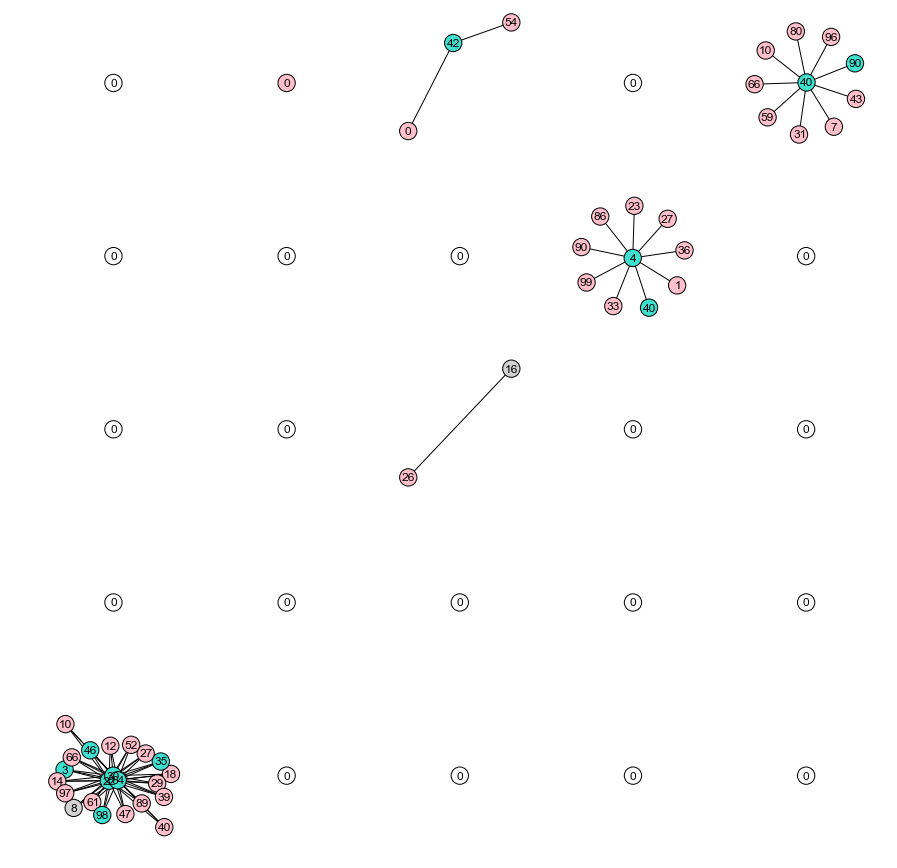

In [16]:
np.random.seed(1723)
fig = plt.figure(figsize = (15,15))
cols = 5
rows = 5
graphs = rows*cols
for i in range(graphs):
    plt.subplot(rows,cols,i)
    #print i
    results = simulate_single_graph_and_output_incompatibility_graph(n =3, L = 100, theta = 10.0, draw_largest_connected_component = True)
    #print 
    determine_S_of_connected_components(results,print_results=False,with_header=True)
plt.draw()

We see that more is going on here than before. A possible explanation thereof is as follows: although each individual column will be subject to the same number of mutations, there is a higher probability that at least *some* columns will be incompatilbe (the there are more of them).

## Setting: $n=3, L = 100, \theta = 50$
(same as before but the site wise mutation rate $\frac \theta {2 L}$ is increased to 0.25 (a tenfold increase)

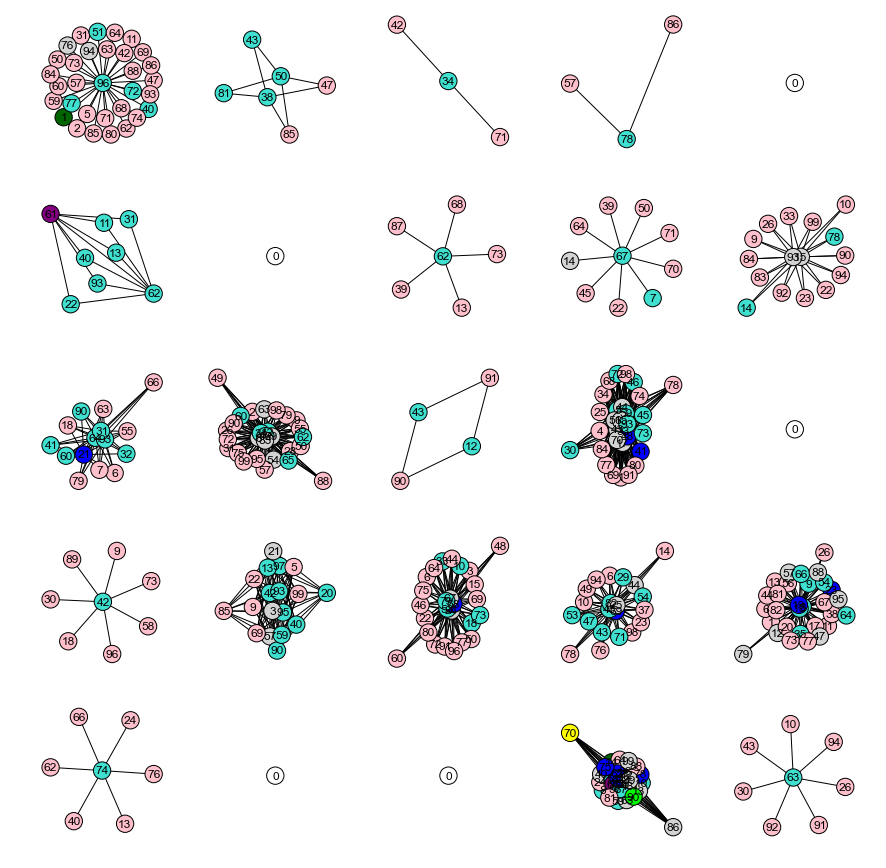

In [17]:
np.random.seed(2317)
fig = plt.figure(figsize = (15,15))
cols = 5
rows = 5
graphs = rows*cols
for i in range(graphs):
    plt.subplot(rows,cols,i)
    #print i
    results = simulate_single_graph_and_output_incompatibility_graph(n =3 , L = 100, theta = 50.0, draw_largest_connected_component = True)
    #print 
    determine_S_of_connected_components(results,print_results=False,with_header=True)
plt.draw()

As before: increasing $\theta$ will lead to a more diverse class of larger incompatibility graphs. An interesting observation here is however that the graphs are still highly centralized.

An interesting observation is it seems that there often seem to be a few hub-nodes affected by a higher number of mutaions, and that edge-nodes tend to be incompatible with almost all of them.